In [1]:
import sys
import numpy as np
import pandas as pd
import glob
import yaml
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Import my modules
sys.path.append('../modules') # Path to modules
from constants import ucsd_colors

In [2]:
path_to_data = '/cw3e/mead/projects/cwp140/scratch/dnash/data/'      # project data -- read only
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

In [10]:
def find_number_rows_cols(nplots):
    ## choose number of columns based on total number of plots
    if nplots > 40:
        ncols = 6
    elif (nplots <= 40) & (nplots > 28):
        ncols = 5
    elif (nplots <= 28) & (nplots > 18):
        ncols = 4
    elif (nplots <= 18):
        ncols = 3
    else:
        ncols = 4
        
    rem = nplots % ncols # check for remainder
    nrows = nplots // ncols # integer division
    
    if rem > 0: # if there is a remainder
        nrows = nrows+1 # add extra row

    rem = (ncols*nrows) - nplots ## now the new remainder is the extra number of plots we don't need
    
    return ncols, nrows, rem


def create_scatter_plot(x_var, y_var, df_lst, xlbl, ylbl, title_lst):
    # list of letters to append to titles
    letter_lst = list(map(chr, range(97, 123)))
    colors = [ucsd_colors['navy'], ucsd_colors['aqua'], ucsd_colors['yellow'], ucsd_colors['grey']]
    legend_lst = [True] + [False]*5
    # legend_lst = [True]*6

    fname = path_to_figs + 'scatterplot_{0}_{1}'.format(x_var, y_var)
    fmt = 'png'
    nplots = len(df_lst)
    ncols, nrows, rem = find_number_rows_cols(nplots)
    
    idx_lst = []
    for i, col in enumerate(range(ncols)):
        for j, row in enumerate(range(nrows)):
            idx = [row, col]
            idx_lst.append(idx)

    idx_lst = idx_lst[:-1*rem]

    fig = plt.figure(figsize=(4*ncols, 4*nrows))
    
    ## Use gridspec to set up a plot with a series of subplots that is
    ## n-rows by n-columns
    gs = GridSpec(nrows, ncols, height_ratios=[1]*nrows, width_ratios = [1]*ncols, wspace=0.25, hspace=0.25)
    ## use gs[rows index, columns index] to access grids

    sns.set_style("whitegrid")

    for i, df in enumerate(df_lst):
        ax = fig.add_subplot(gs[idx_lst[i][0], idx_lst[i][1]])

        # plot scatterplot
        n = df[y_var].count()
        g = sns.scatterplot(data=df, x=x_var, y=y_var, ax=ax, c=np.array([colors[0]]), alpha=0.5)

        ax.set_xlabel(xlbl)
        ax.set_ylabel(ylbl)

        ax.set_title('({0}) {1}'.format(letter_lst[i], title_lst[i]), loc='left', size=10)
        ax.set_title('(n={0})'.format(n), loc='right', size=10)

    # Save the figure
    fig.savefig('%s.%s' % (fname, fmt), bbox_inches='tight', dpi=300)
    plt.show()
    fig.clf()

    plotFile = fname + '.png'
    print(plotFile)
    
    
def create_scatter_plot_multivar(x_var, y_var, df, xlbl, ylbl):
    # list of letters to append to titles
    letter_lst = list(map(chr, range(97, 123)))
    colors = [ucsd_colors['navy'], ucsd_colors['aqua'], ucsd_colors['yellow'], ucsd_colors['grey']]
    legend_lst = [True] + [False]*5
    # legend_lst = [True]*6

    fname = path_to_figs + 'scatterplot_{1}'.format(x_var, y_var)
    fmt = 'png'
    nplots = len(x_var)
    ncols, nrows, rem = find_number_rows_cols(nplots)
    
    idx_lst = []
    for i, col in enumerate(range(ncols)):
        for j, row in enumerate(range(nrows)):
            idx = [row, col]
            idx_lst.append(idx)

    idx_lst = idx_lst[:-1*rem]

    fig = plt.figure(figsize=(4*ncols, 4*nrows))
    
    ## Use gridspec to set up a plot with a series of subplots that is
    ## n-rows by n-columns
    gs = GridSpec(nrows, ncols, height_ratios=[1]*nrows, width_ratios = [1]*ncols, wspace=0.25, hspace=0.25)
    ## use gs[rows index, columns index] to access grids

    sns.set_style("whitegrid")

    for i, x in enumerate(x_var):
        print(x)
        ax = fig.add_subplot(gs[idx_lst[i][0], idx_lst[i][1]])

        # plot scatterplot
        n = df[y_var].count()
        g = sns.scatterplot(data=df, x=x, y=y_var, ax=ax, c=np.array([colors[0]]), alpha=0.5)

        ax.set_xlabel(xlbl[i])
        ax.set_ylabel(ylbl)

        # ax.set_title('({0}) {1}'.format(letter_lst[i], title_lst[i]), loc='left', size=10)
        ax.set_title('(n={0})'.format(n), loc='right', size=10)

    # Save the figure
    fig.savefig('%s.%s' % (fname, fmt), bbox_inches='tight', dpi=300)
    plt.show()
    fig.clf()

    plotFile = fname + '.png'
    print(plotFile)

<Axes: >

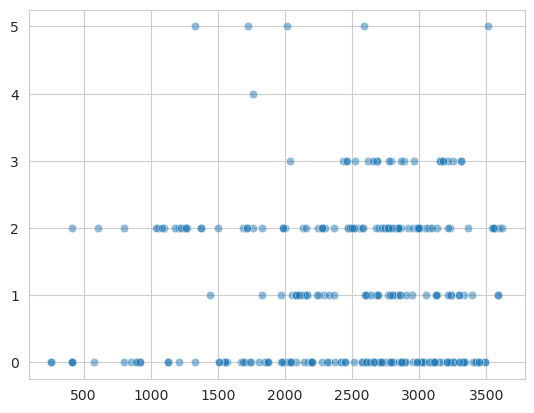

In [20]:
sns.scatterplot(x=result['freezing_level'].values, y=result['impact_scale'].values, alpha=0.5)

IVT_max
duration
IVT_dir
tIVT


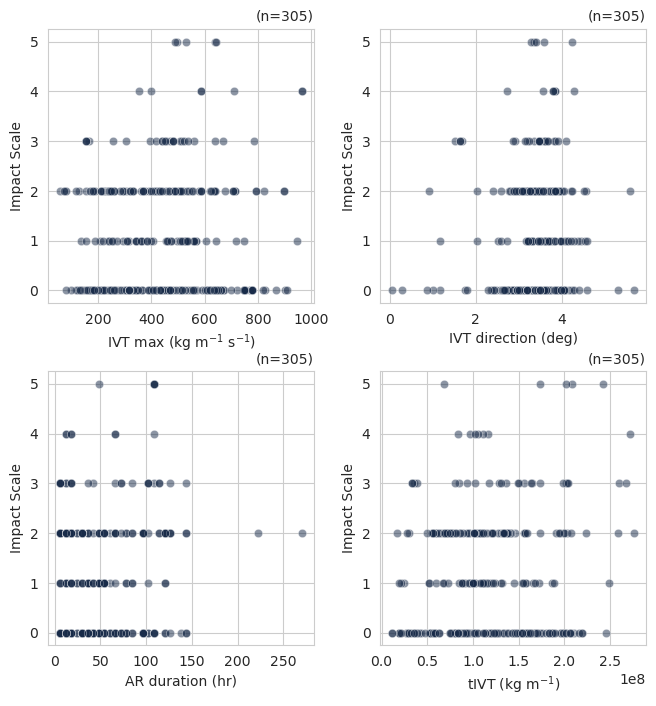

../figs/scatterplot_impact_scale.png


In [12]:
varlst = ['IVT_max', 'duration', 'IVT_dir', 'tIVT']
varnames = ['IVT max (kg m$^{-1}$ s$^{-1}$)', 'AR duration (hr)', 'IVT direction (deg)', 'tIVT (kg m$^{-1}$)']
s = create_scatter_plot_multivar(varlst, 'impact_scale', result, varnames, 'Impact Scale')

In [4]:
fname_lst = glob.glob('../out/combined_df_*.csv')
print(fname_lst)
df_lst = []
df_lst2 = [] # whole dataset
for i, fname in enumerate(fname_lst):   
    df = pd.read_csv(fname)
    
    ## clean freezing level - set to nan where freezing level > 10000 m
    df.loc[(df.freezing_level > 10000), 'freezing_level'] = np.nan 
    
    ## clean ASOS_1hr - set to nan where ASOS_1hr > 200 mm per hour
    df.loc[(df.ASOS_1hr > 50), 'ASOS_1hr'] = np.nan
    df.loc[((df.ASOS_prec_accum > 600) | (df.ASOS_prec_accum < 0)), 'ASOS_prec_accum'] = np.nan 
    
    df_lst2.append(df)
    df = df.loc[df['impact_scale'] >= 0]
    
    df_lst.append(df)
    
result = pd.concat(df_lst)
list(df_lst2[0].columns)

['../out/combined_df_HONA2.csv', '../out/combined_df_PAYA.csv', '../out/combined_df_PAPG.csv', '../out/combined_df_PAHN.csv', '../out/combined_df_PAKW.csv', '../out/combined_df_COOPHCSA2.csv', '../out/combined_df_KTNA2.csv', '../out/combined_df_PAGY.csv', '../out/combined_df_PAJN.csv', '../out/combined_df_PAWG.csv', '../out/combined_df_PAGS.csv', '../out/combined_df_PASI.csv', '../out/combined_df_PAKT.csv']


['trackID',
 'Unnamed: 0',
 'trackID.1',
 'start_date',
 'end_date',
 'duration',
 'IVT_max',
 'IVT_max_time',
 'IVT_dir',
 'tIVT',
 'freezing_level',
 'ar_scale',
 'GFS_prec_accum',
 'GFS_prec_max_rate',
 'ASOS_prec_accum',
 'ASOS_1hr',
 'ASOS_3hr',
 'ASOS_6hr',
 'ASOS_12hr',
 'ASOS_24hr',
 'impact_scale',
 'impacts',
 'impact_notes',
 'impact_type',
 'misc']

In [5]:
## read .yaml file with station information
yaml_doc = '../data/ASOS_station_info.yaml'
config = yaml.load(open(yaml_doc), Loader=yaml.SafeLoader)
community_lst = []
for i, stationID in enumerate(config):
    stationName = config[stationID]['name']
    lbl = '{0}: {1}'.format(stationName, stationID)
    community_lst.append(lbl)

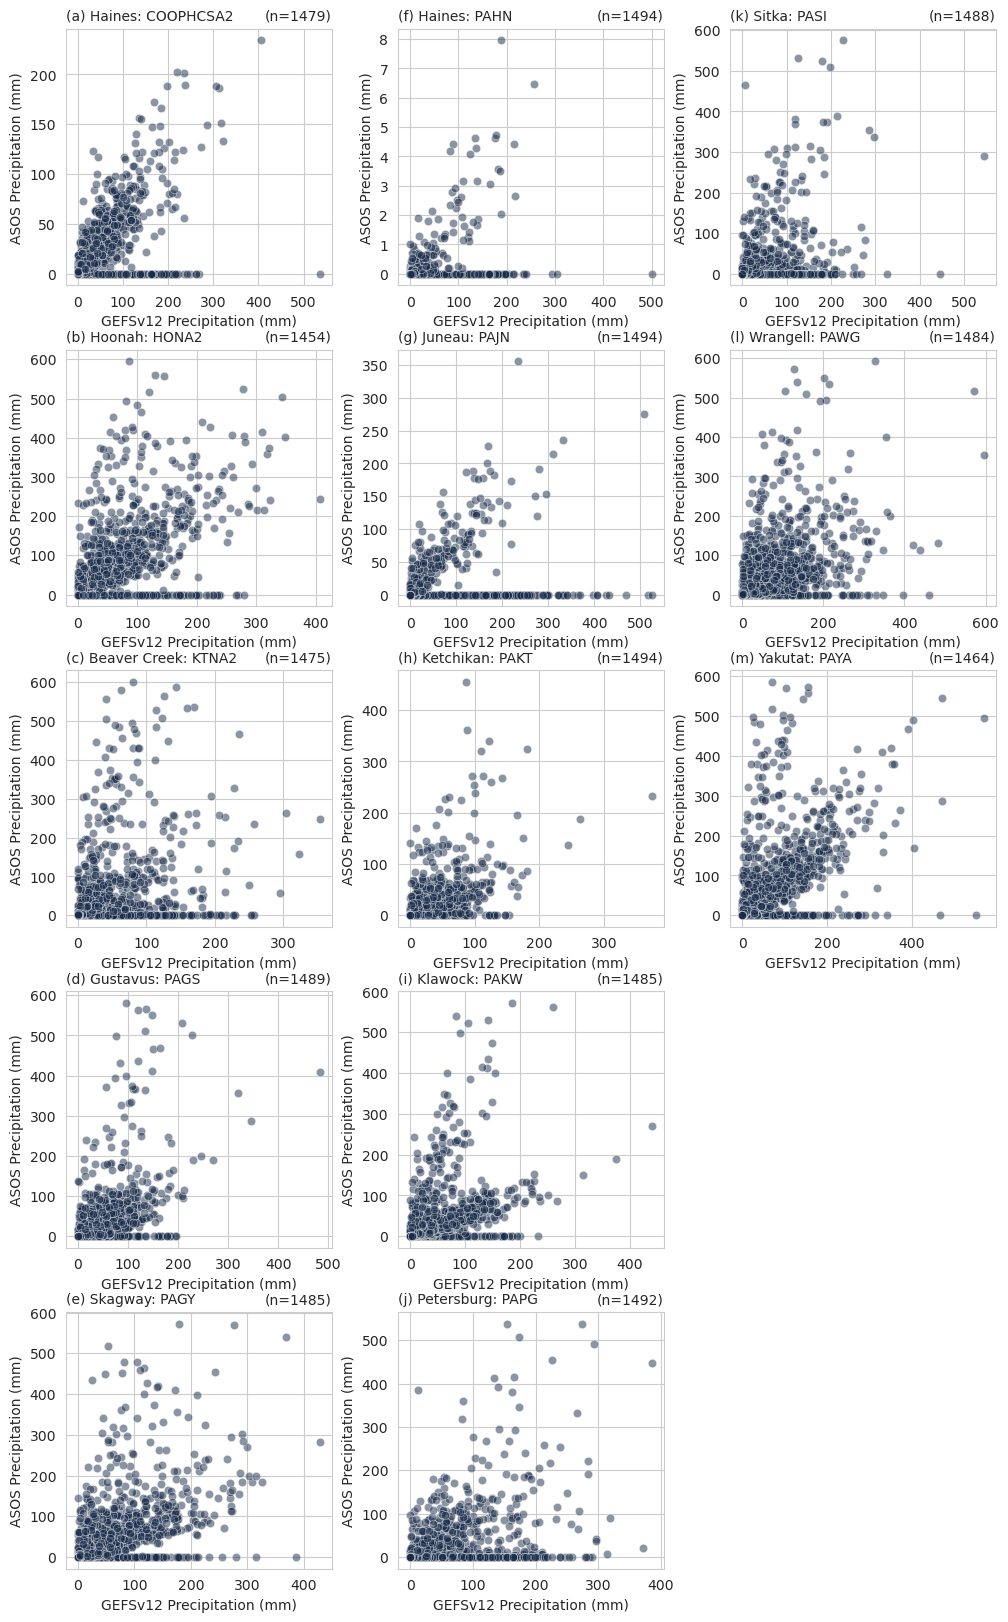

../figs/scatterplot_GFS_prec_accum_ASOS_prec_accum.png


In [6]:
s = create_scatter_plot('GFS_prec_accum', 'ASOS_prec_accum', df_lst2, 'GEFSv12 Precipitation (mm)', 'ASOS Precipitation (mm)', community_lst)

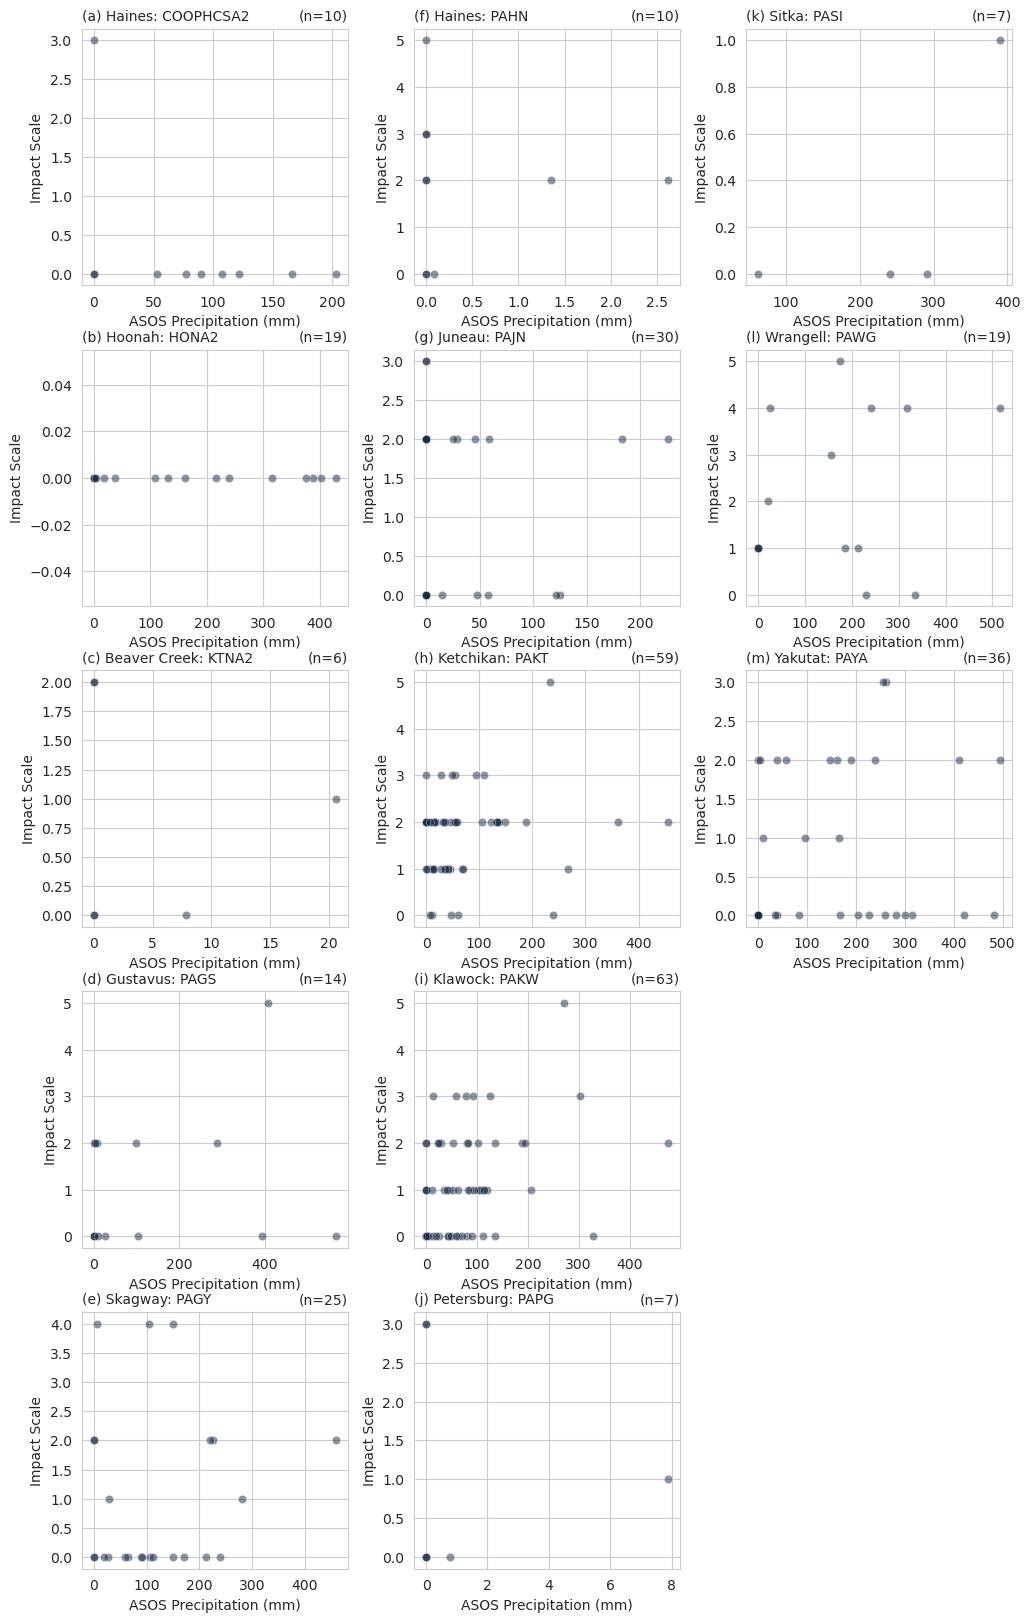

../figs/scatterplot_ASOS_prec_accum_impact_scale.png


In [21]:
s = create_scatter_plot('ASOS_prec_accum', 'impact_scale', df_lst2, 'ASOS Precipitation (mm)', 'Impact Scale', community_lst)

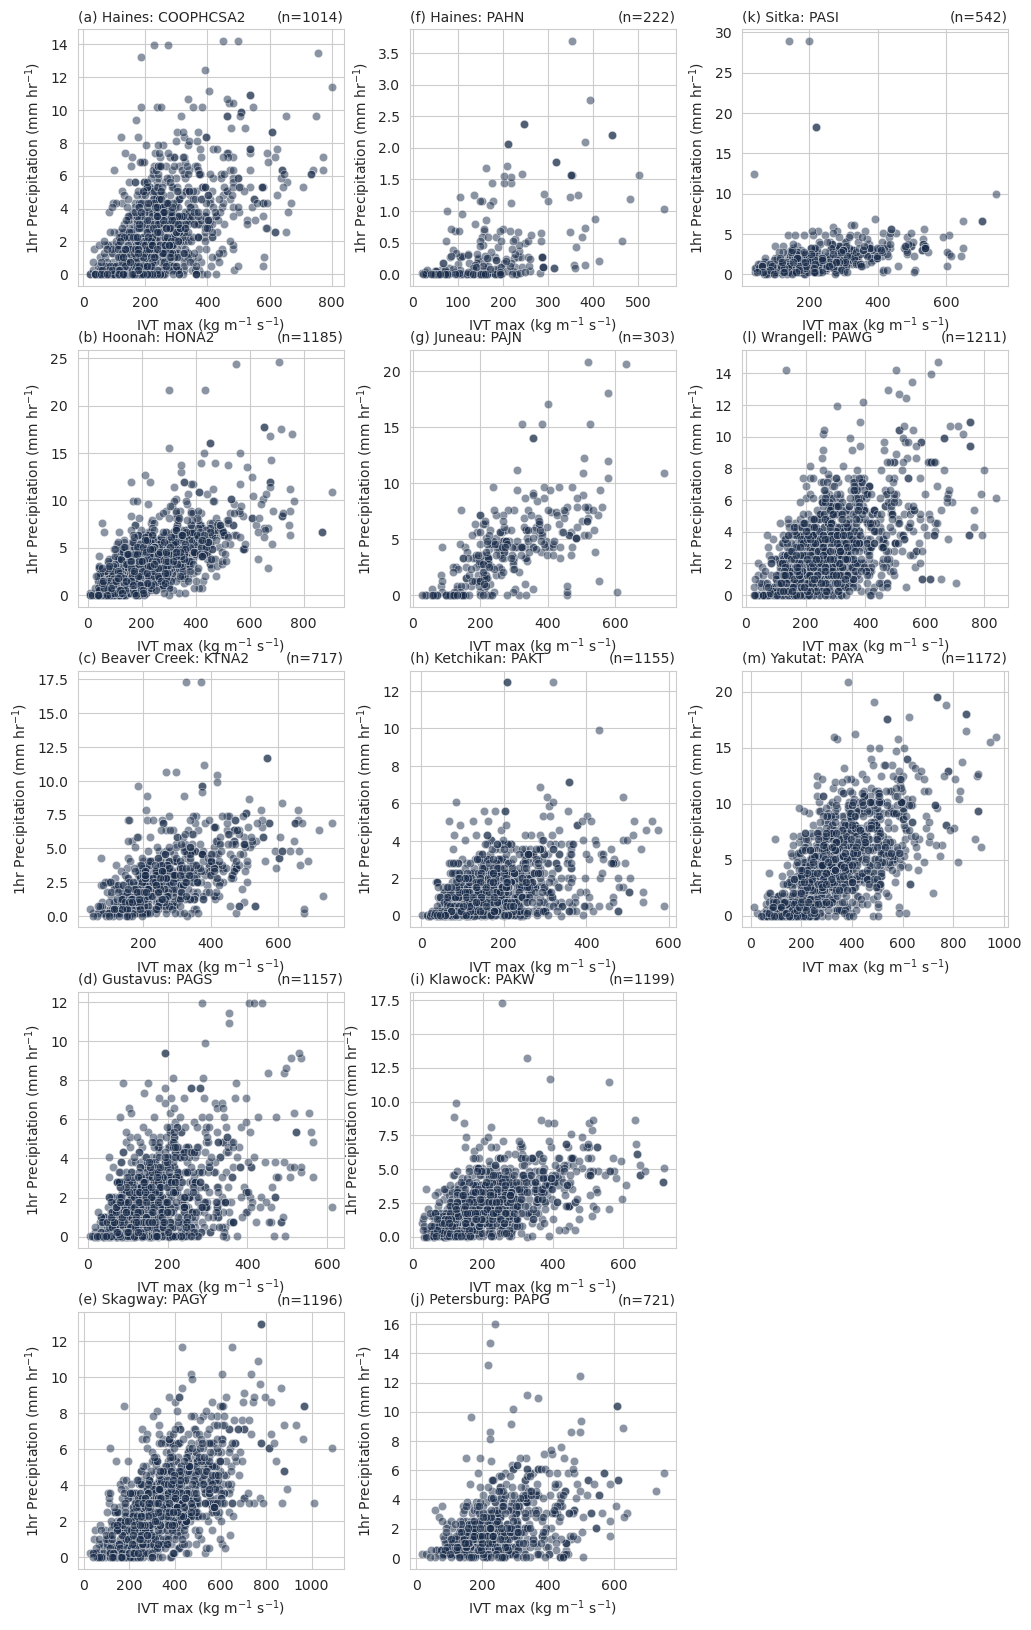

../figs/scatterplot_IVT_max_ASOS_1hr.png


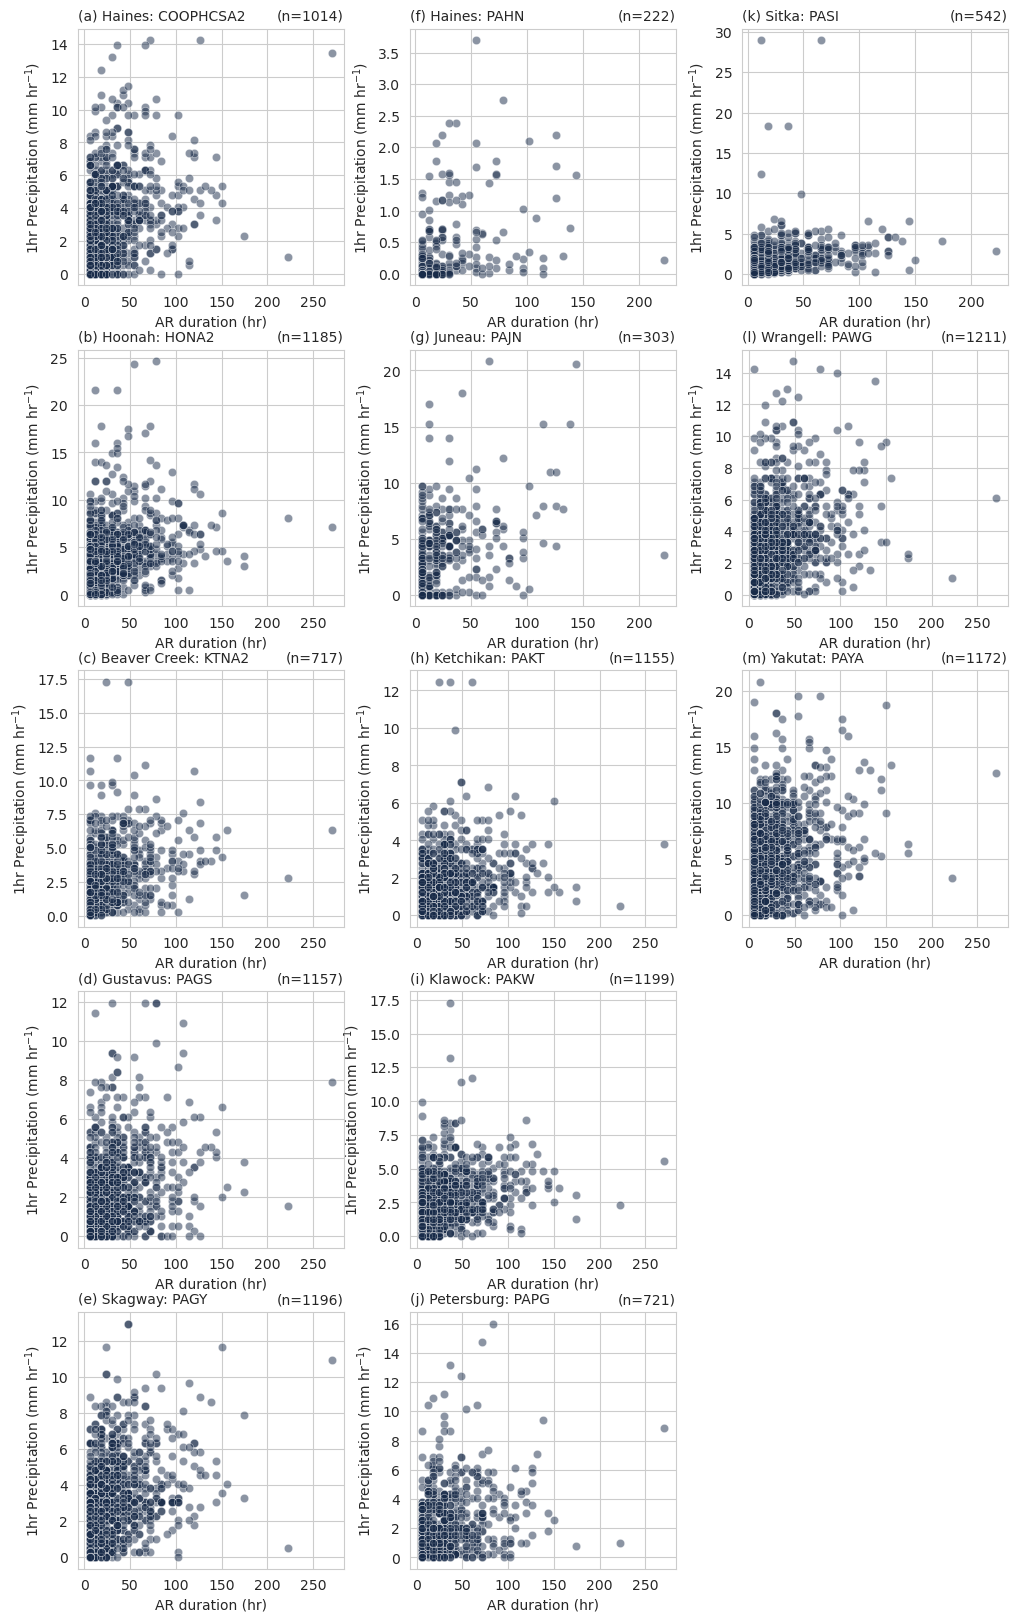

../figs/scatterplot_duration_ASOS_1hr.png


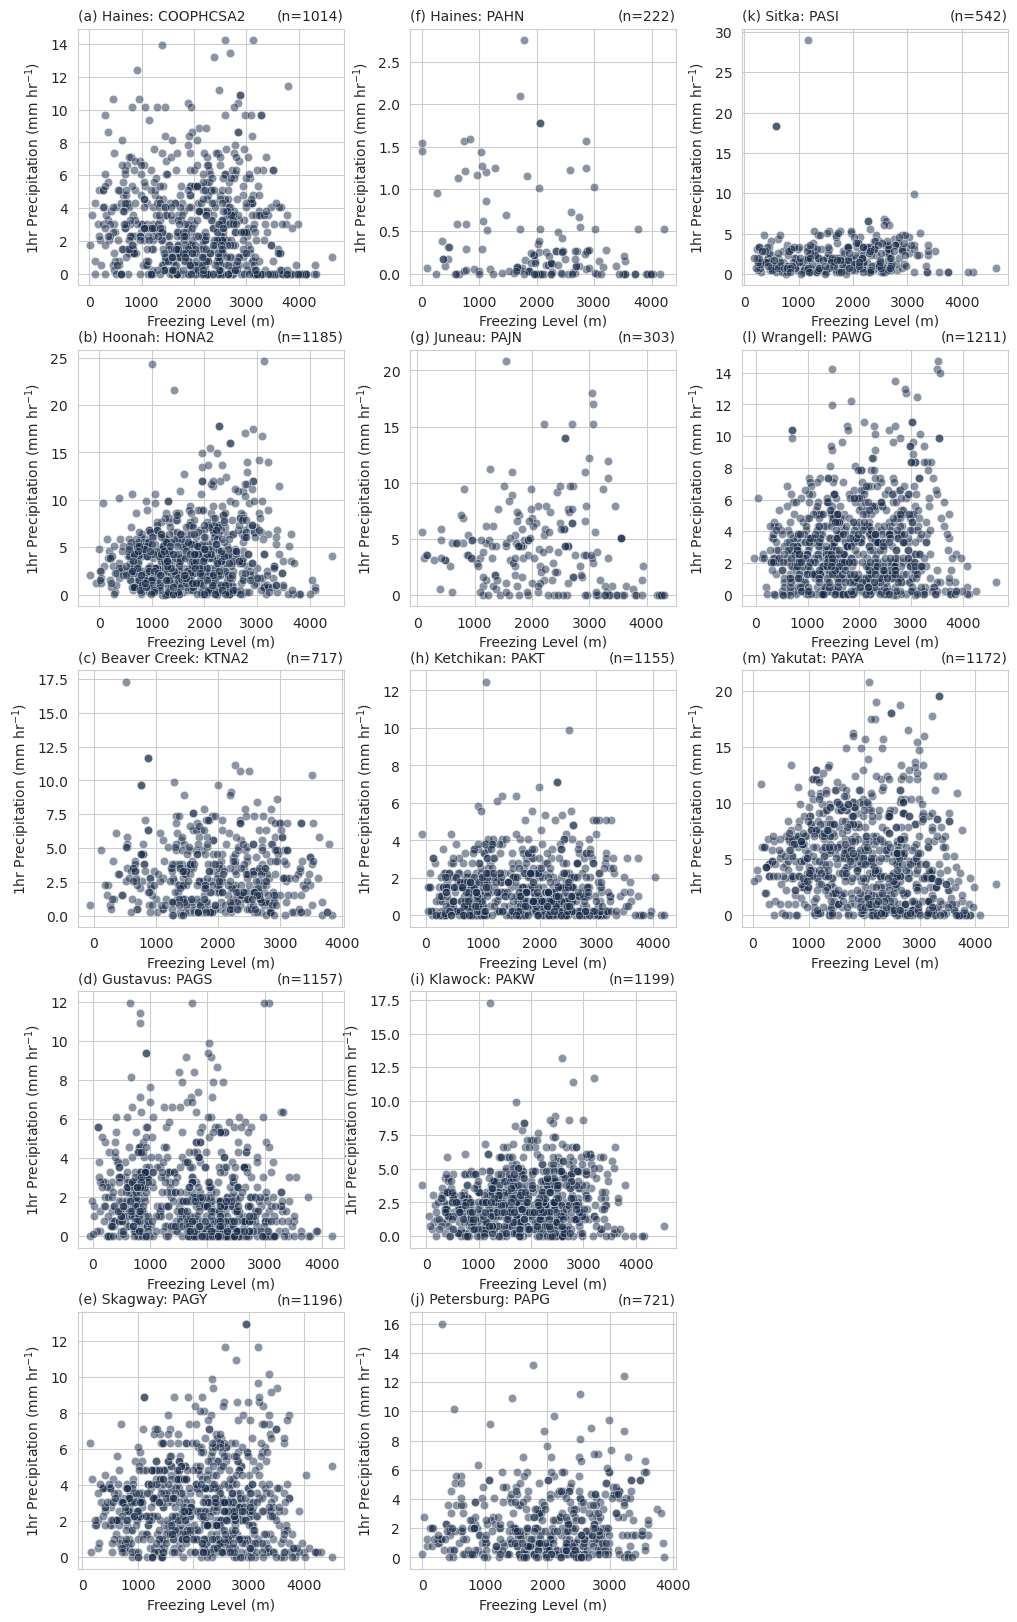

../figs/scatterplot_freezing_level_ASOS_1hr.png


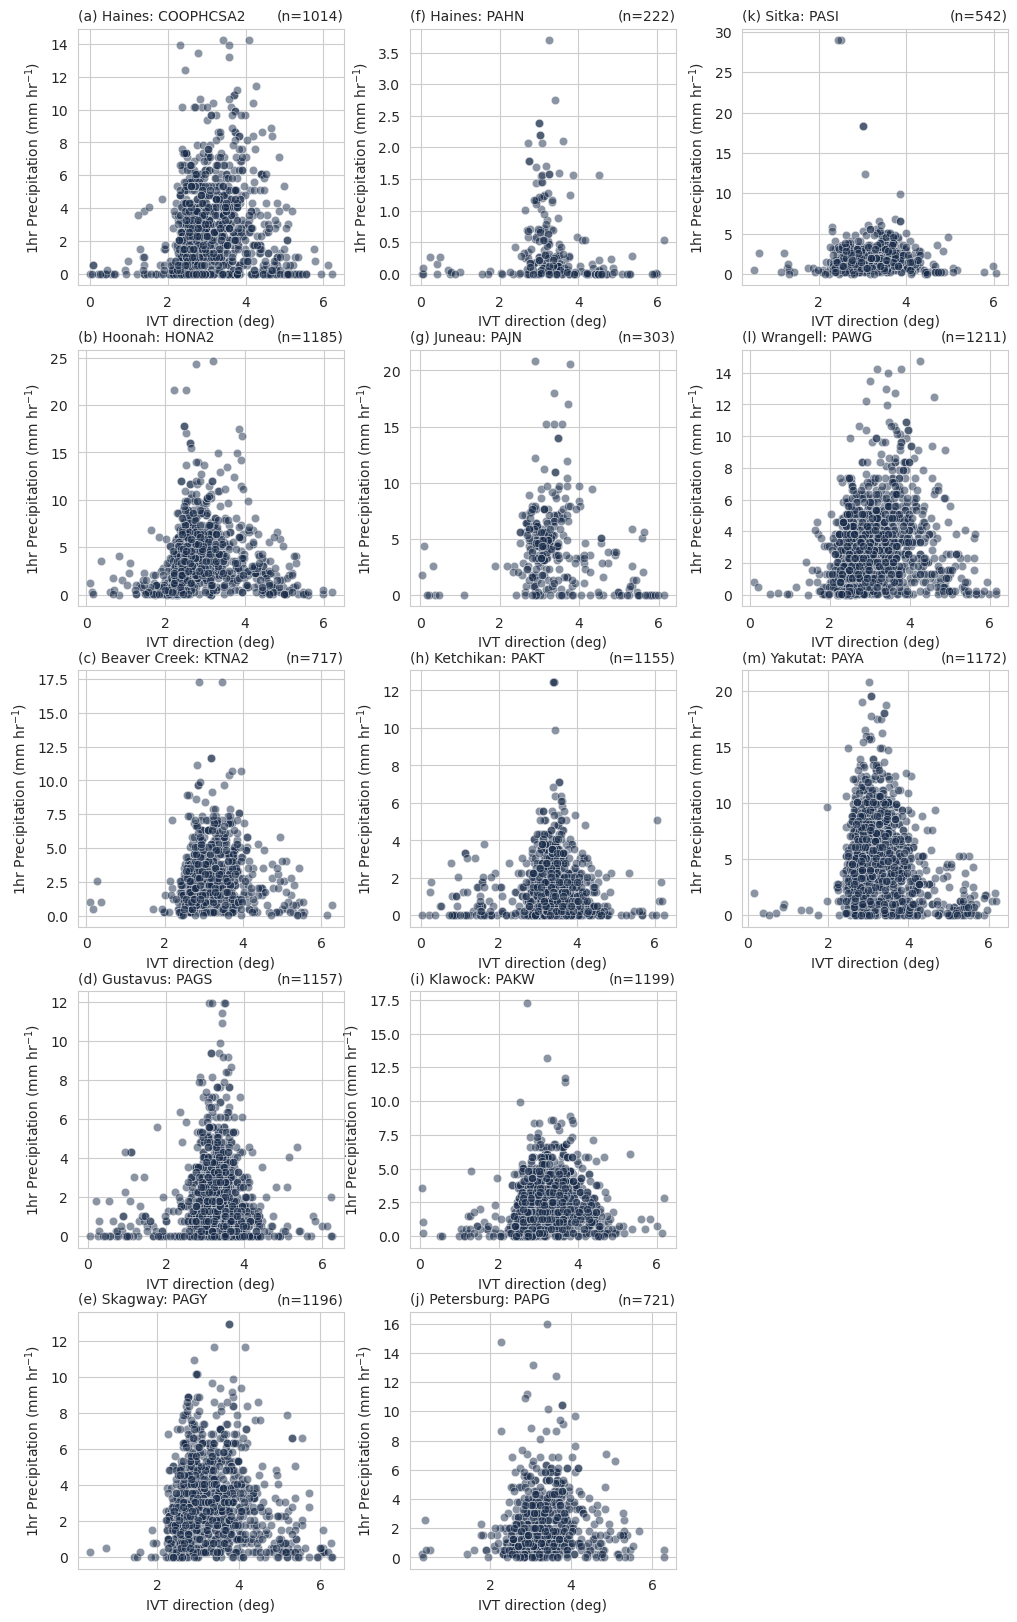

../figs/scatterplot_IVT_dir_ASOS_1hr.png


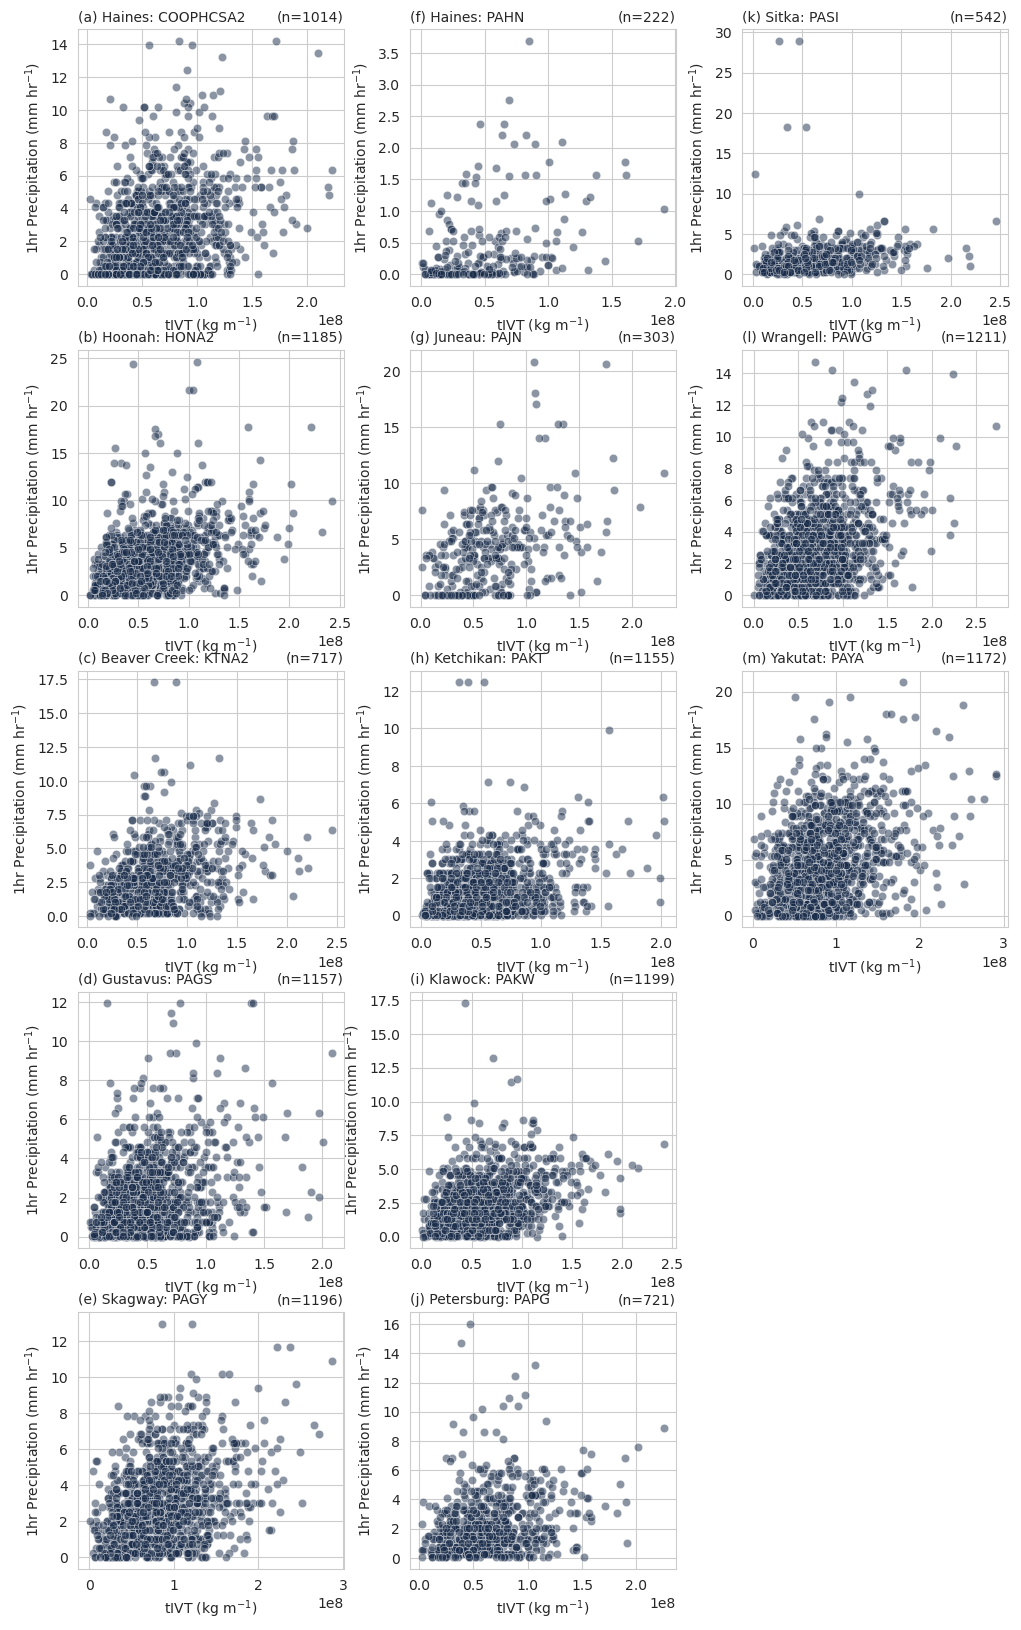

../figs/scatterplot_tIVT_ASOS_1hr.png


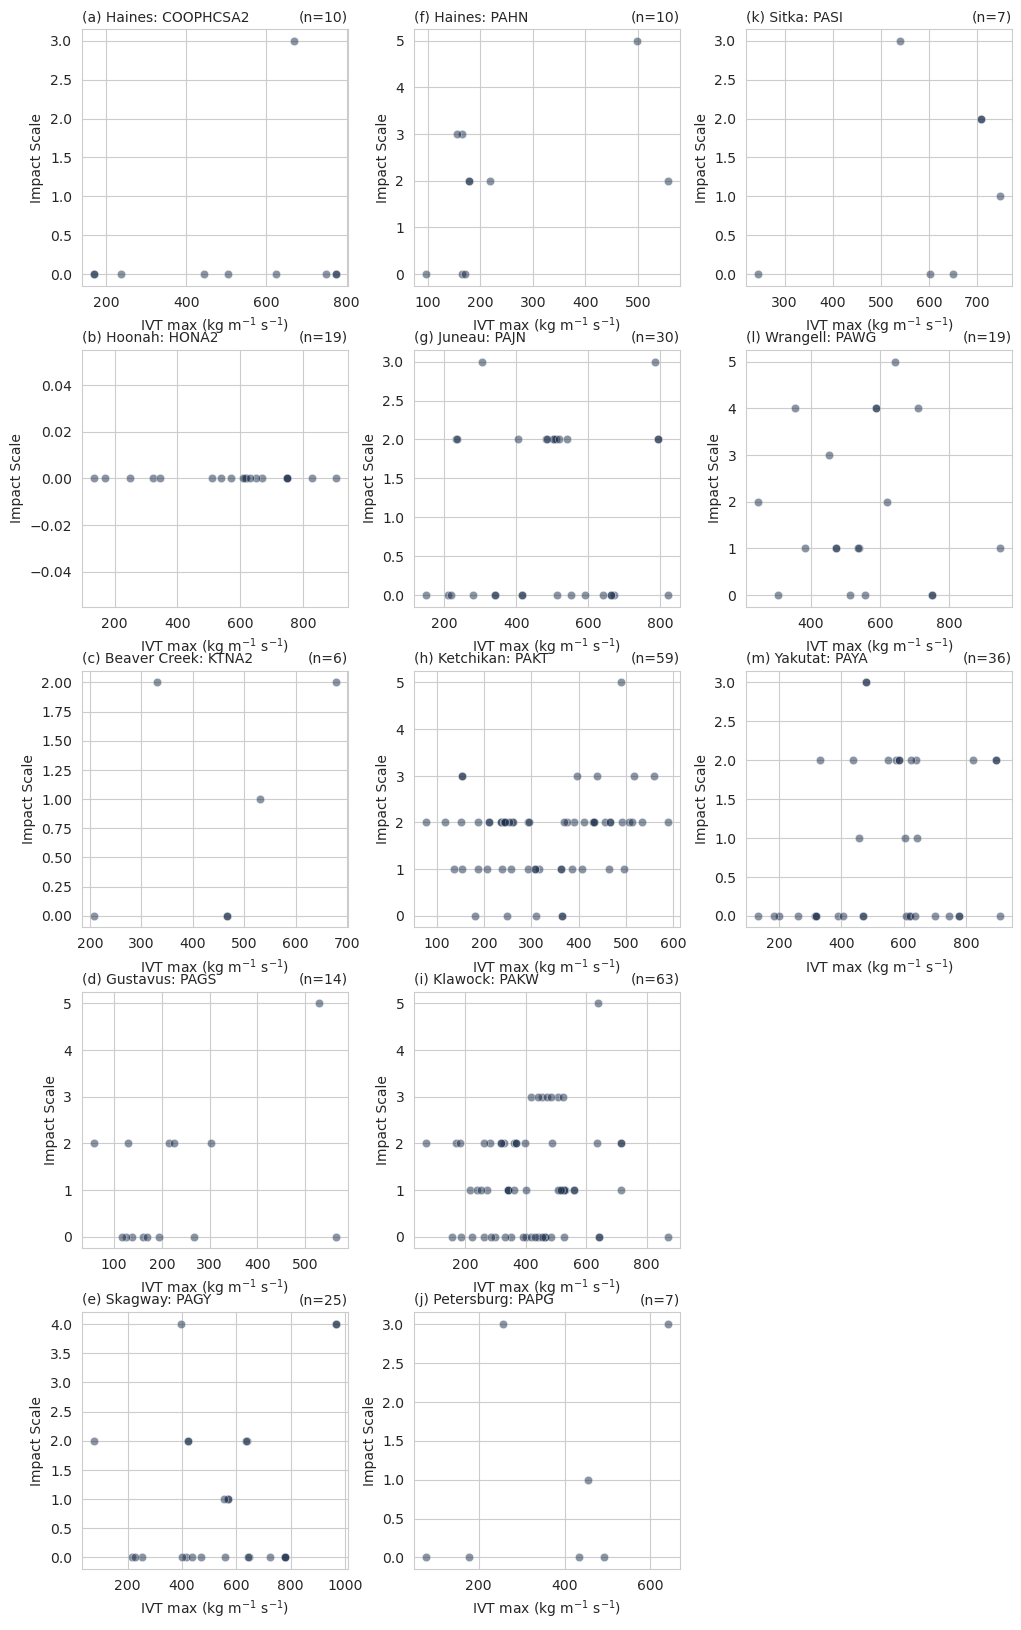

../figs/scatterplot_IVT_max_impact_scale.png


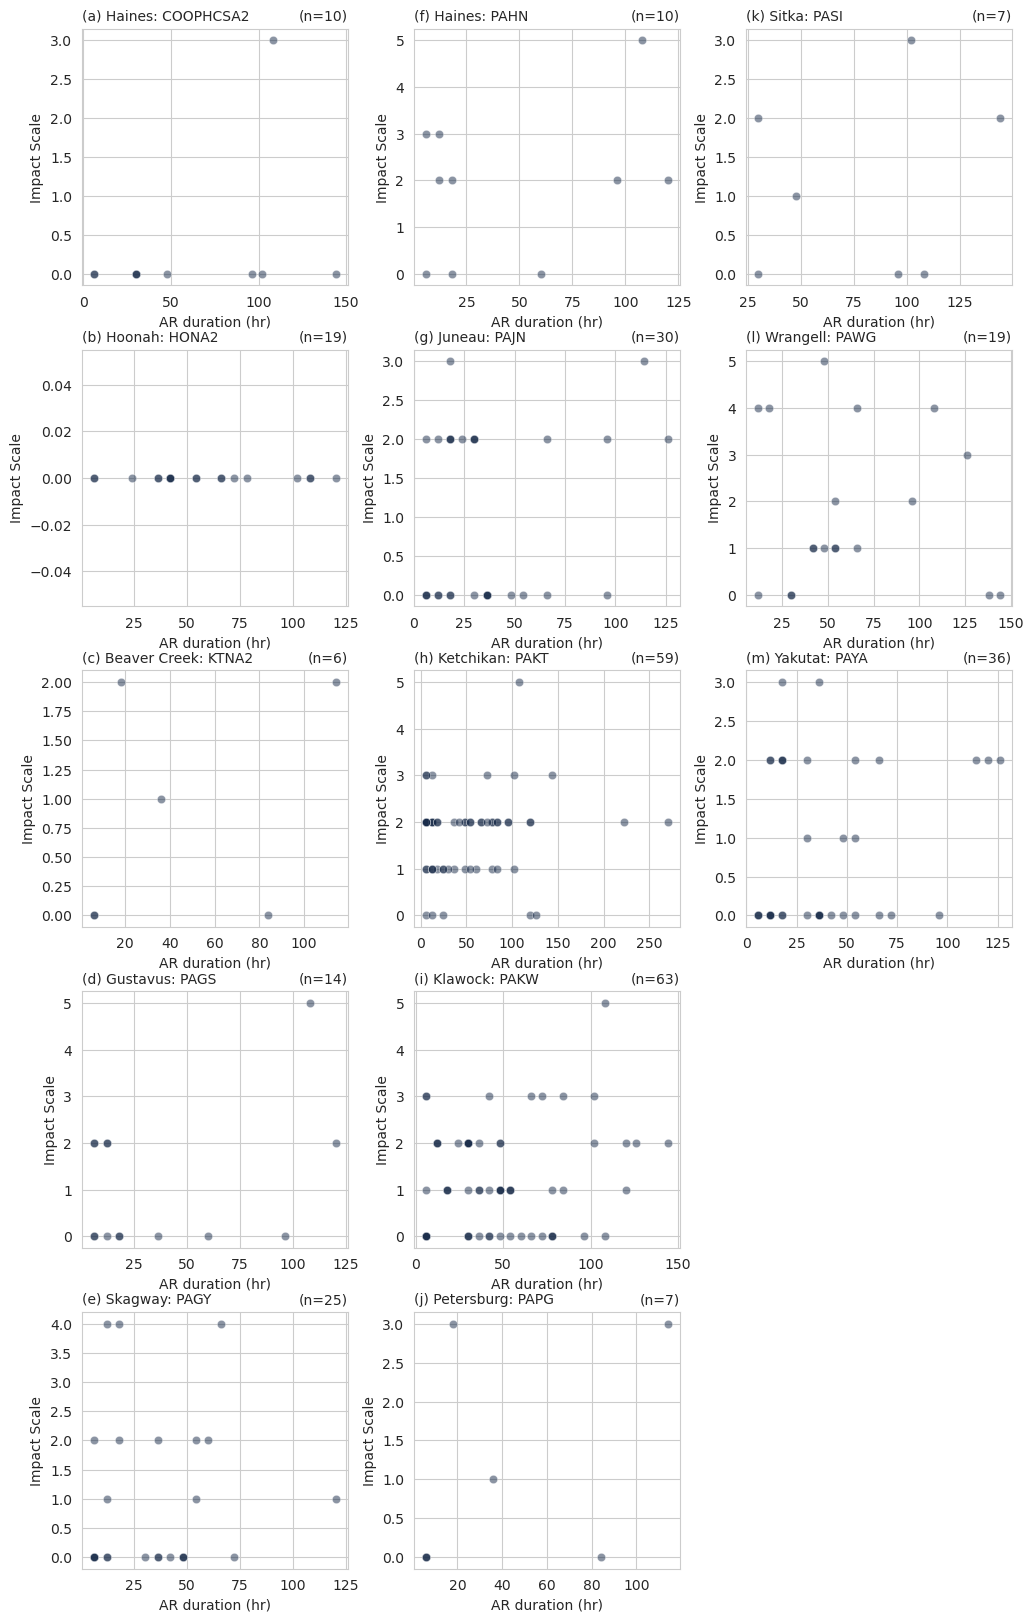

../figs/scatterplot_duration_impact_scale.png


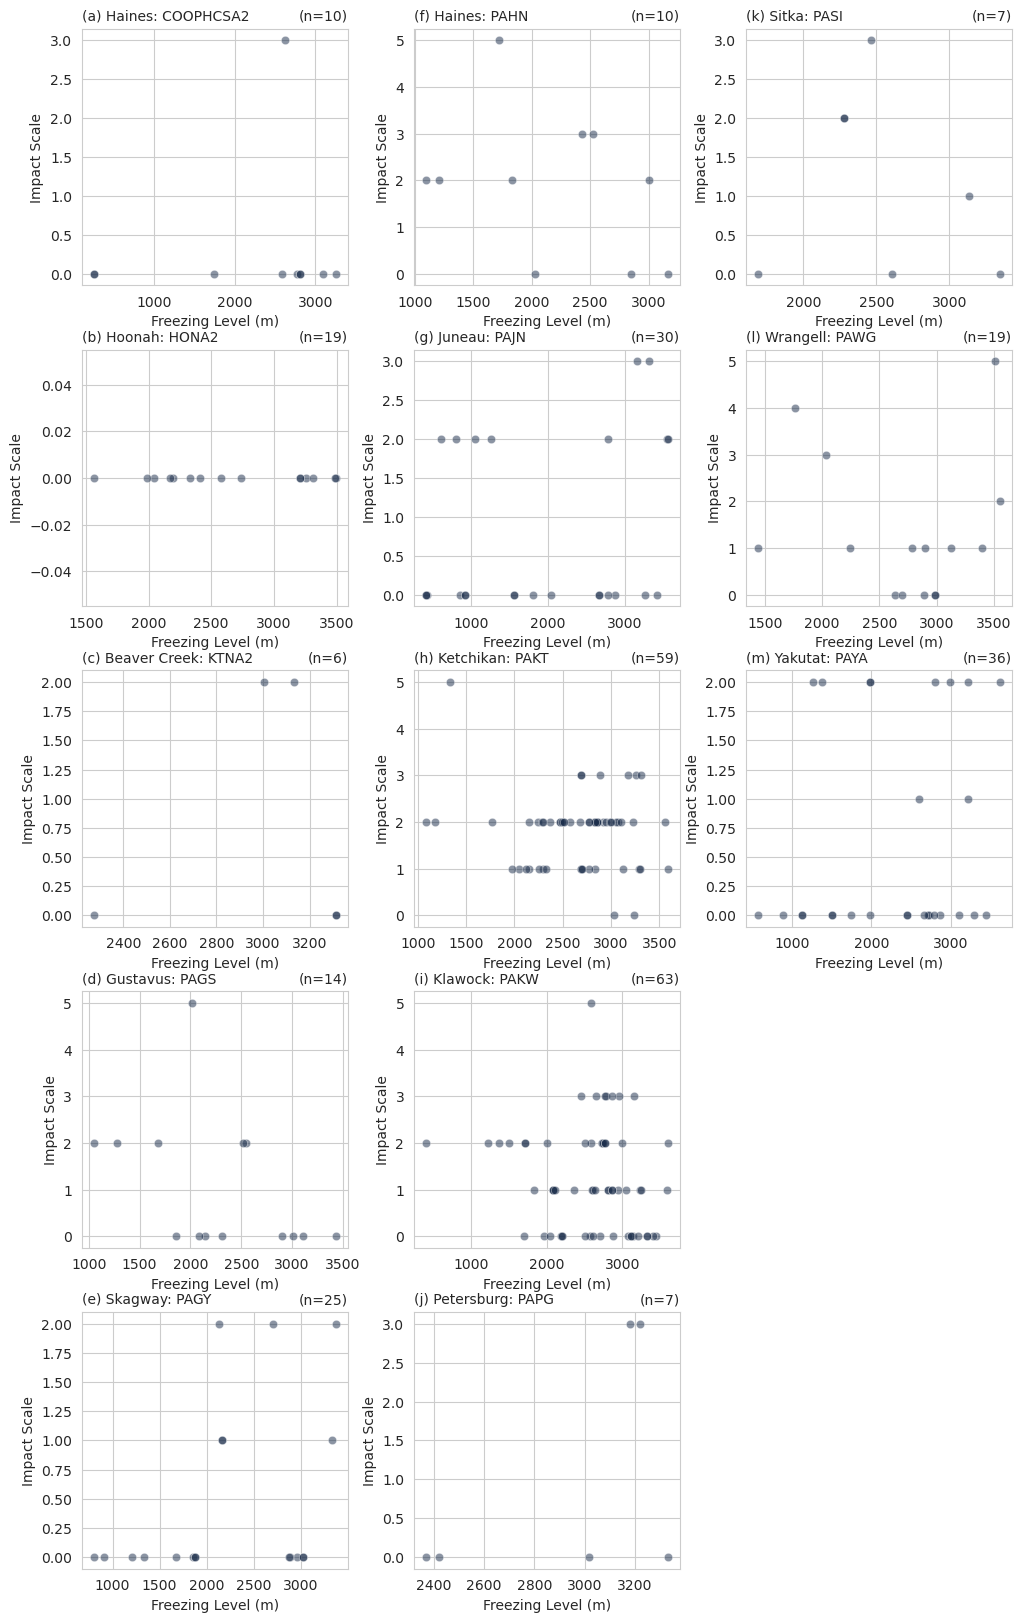

../figs/scatterplot_freezing_level_impact_scale.png


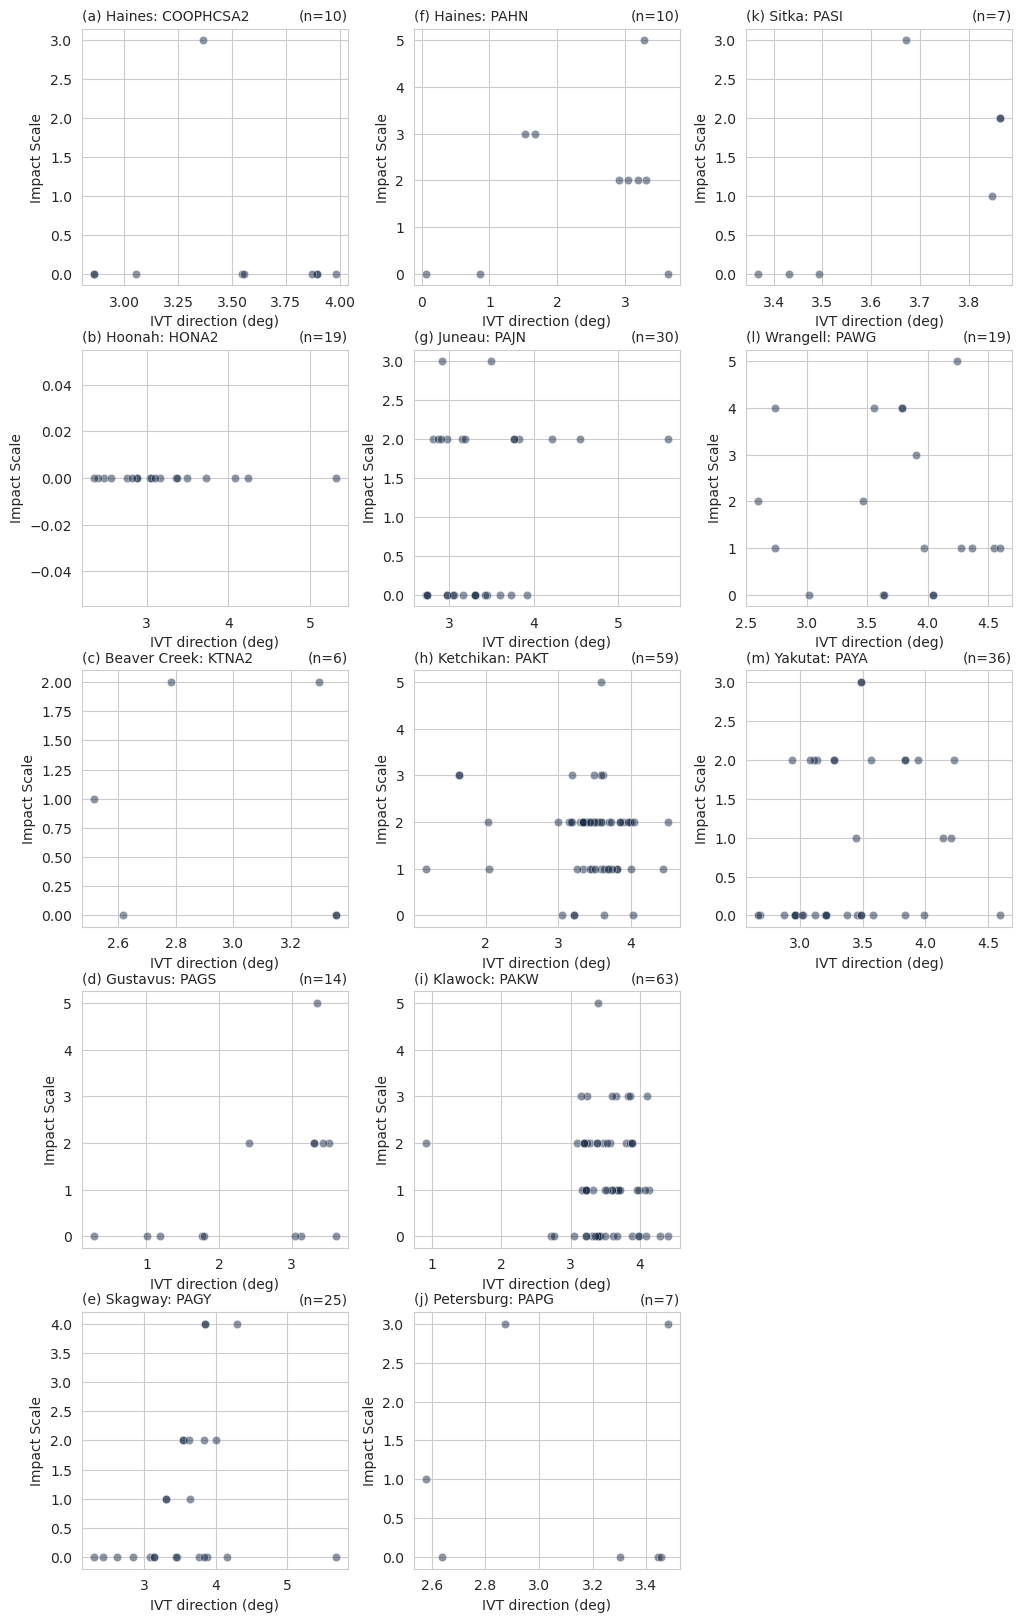

../figs/scatterplot_IVT_dir_impact_scale.png


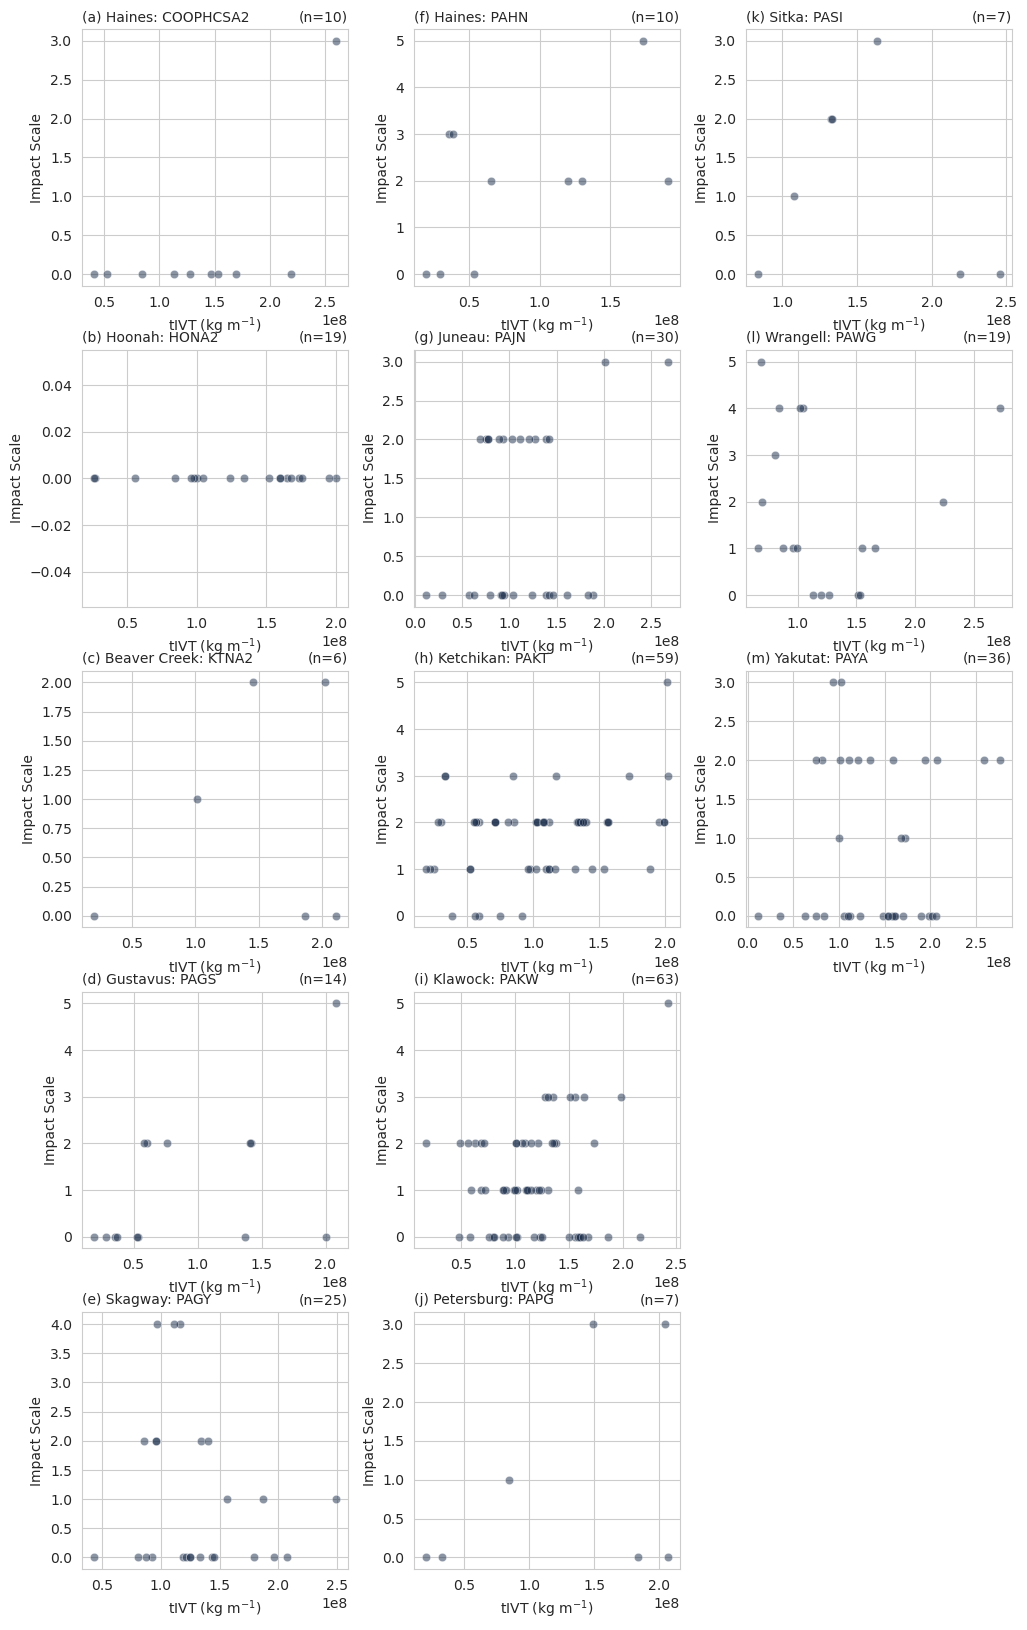

../figs/scatterplot_tIVT_impact_scale.png


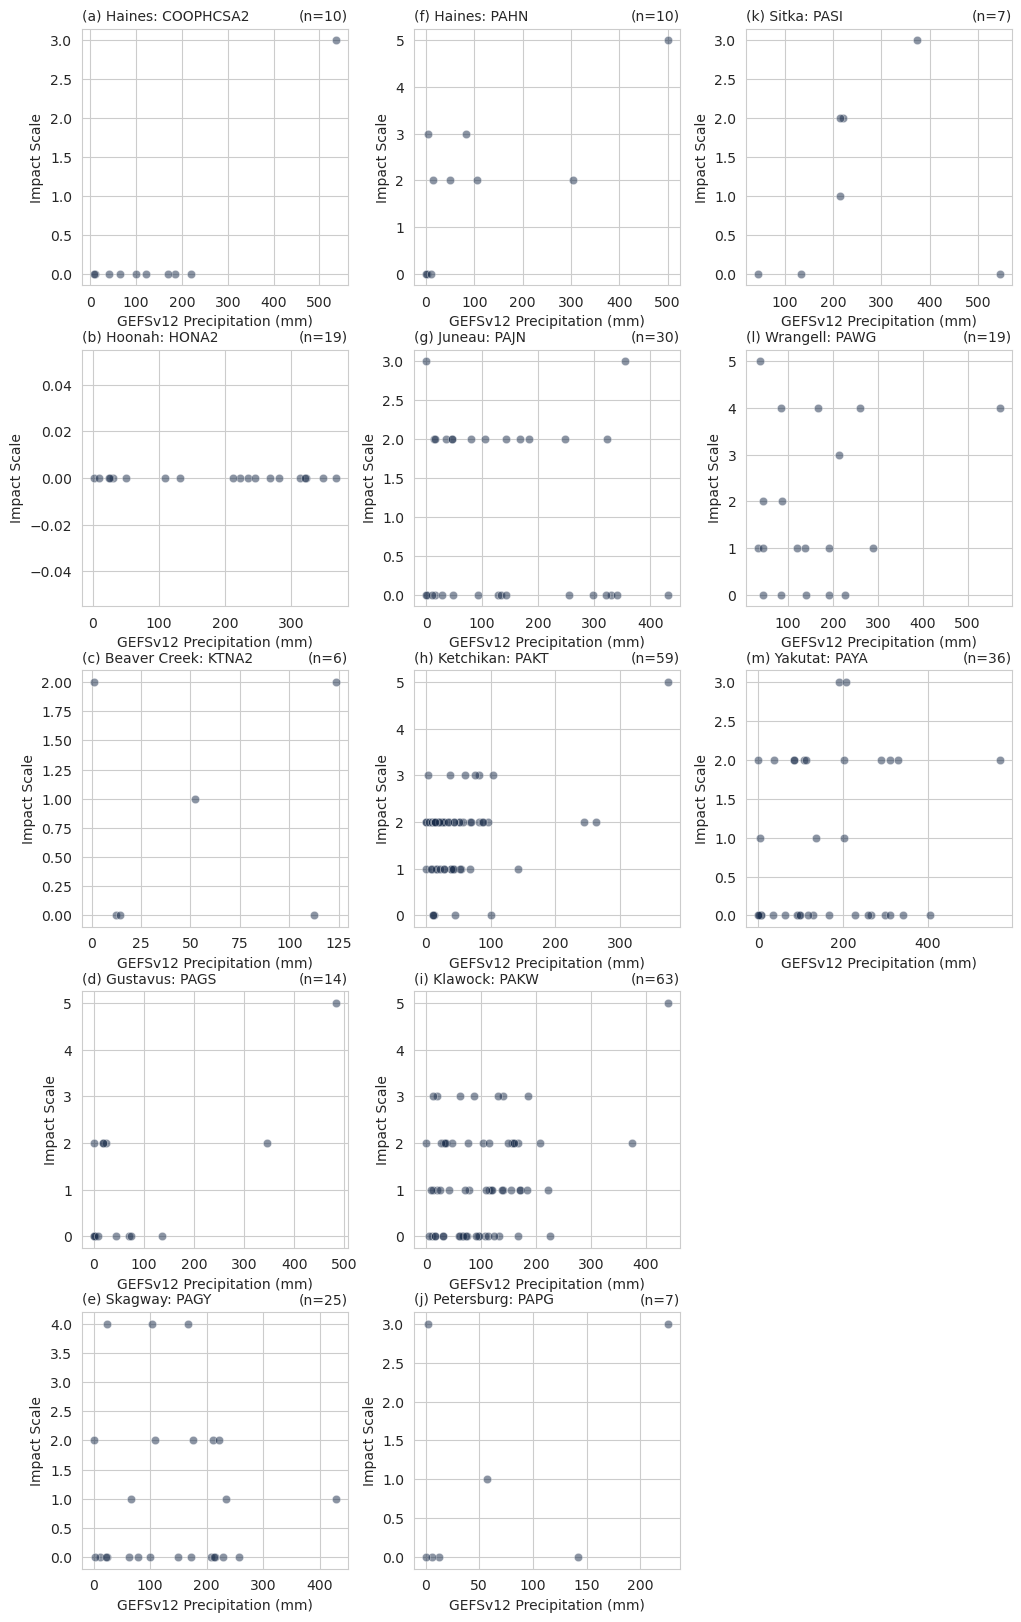

../figs/scatterplot_GFS_prec_accum_impact_scale.png


ValueError: cannot reindex on an axis with duplicate labels

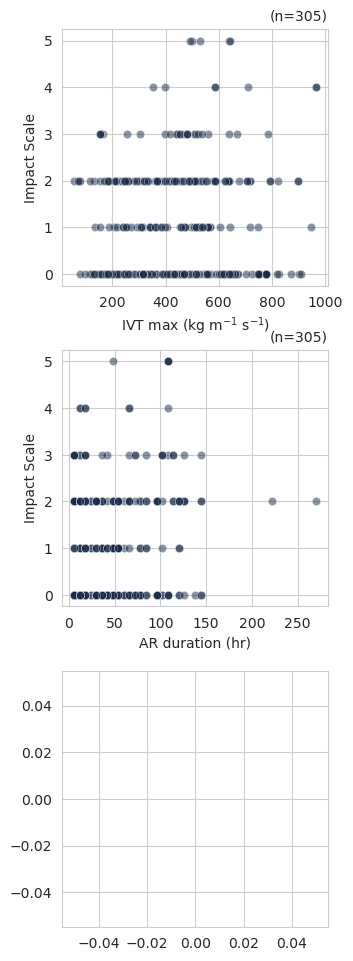

In [7]:
varlst = ['IVT_max', 'duration', 'freezing_level', 'IVT_dir', 'tIVT']
varnames = ['IVT max (kg m$^{-1}$ s$^{-1}$)', 'AR duration (hr)', 'Freezing Level (m)', 'IVT direction (deg)', 'tIVT (kg m$^{-1}$)']

for i, (varname, varlbl) in enumerate(zip(varlst, varnames)):
    s = create_scatter_plot(varname, 'ASOS_1hr', df_lst2, varlbl, '1hr Precipitation (mm hr$^{-1}$)', community_lst)
    
for i, (varname, varlbl) in enumerate(zip(varlst, varnames)):
    s = create_scatter_plot(varname, 'impact_scale', df_lst, varlbl, 'Impact Scale', community_lst)
    
    
s = create_scatter_plot('GFS_prec_accum', 'impact_scale', df_lst2, 'GEFSv12 Precipitation (mm)', 'Impact Scale', community_lst)
 

